# MovieLens
电影评分数据简单分析
## 1 prepare

In [139]:
# prepare
import pandas as pd
import matplotlib.pyplot as plt
moives = pd.read_table('../Datasets/movielens/movies.dat', sep = '::', encoding='latin-1',
                       header=None, index_col=0, names= ['moive_id', 'title', 'genres']
                       )
ratings = pd.read_table('../Datasets/movielens/ratings.dat', sep = '::', encoding='latin-1',
                       header=None,  names= ['user_id', 'moive_id', 'rating', 'timestamp']
                       )
users = pd.read_table('../Datasets/movielens/users.dat', sep = '::', encoding='latin-1',
                       header=None, index_col=0, names= ['user_id', 'gender', 'age', 'occupation', 'zip']
                       )

C:\Users\馨馨\AppData\Local\Temp\ipykernel_9500\2140733677.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  moives = pd.read_table('../Datasets/movielens/movies.dat', sep = '::', encoding='latin-1',
C:\Users\馨馨\AppData\Local\Temp\ipykernel_9500\2140733677.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('../Datasets/movielens/ratings.dat', sep = '::', encoding='latin-1',
C:\Users\馨馨\AppData\Local\Temp\ipykernel_9500\2140733677.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different f

In [140]:
moives.head(10)

,title,genres
moive_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children's
9,Sudden Death (1995),Action


In [141]:
ratings.head(10)

,user_id,moive_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [142]:
users.head(10)

,gender,age,occupation,zip
user_id,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
6,F,50,9,55117
7,M,35,1,06810
8,M,25,12,11413
9,M,25,17,61614


In [143]:
tmp  = pd.merge (ratings, moives, on = 'moive_id', how = 'left')
movieLens = pd.merge(tmp, users, on = 'user_id', how='left')
movieLens

,user_id,moive_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


In [144]:
movieLens.columns

Index(['user_id', 'moive_id', 'rating', 'timestamp', 'title', 'genres',
       'gender', 'age', 'occupation', 'zip'],
      dtype='object')

##  2 简单清洗

In [145]:
# 查看各电影评分数量
rating_count = movieLens.groupby('title').size()    #！ Series
rating_count.sort_values()

title
With Byrd at the South Pole (1930)                          1
Superweib, Das (1996)                                       1
Lotto Land (1995)                                           1
Aiqing wansui (1994)                                        1
Live Virgin (1999)                                          1
                                                         ... 
Jurassic Park (1993)                                     2672
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode IV - A New Hope (1977)                2991
American Beauty (1999)                                   3428
Length: 3706, dtype: int64

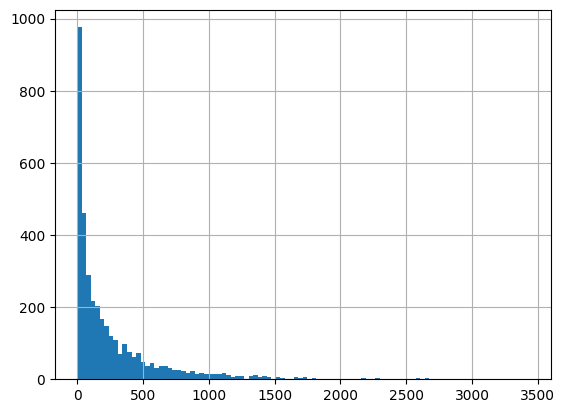

In [146]:
rating_count.hist(bins=100)
plt.show()

<Axes: >

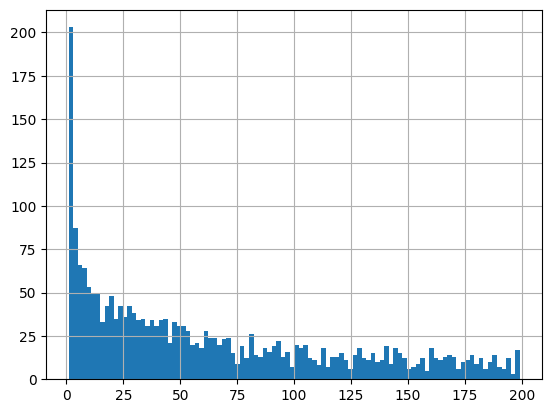

In [147]:
tmp = rating_count[rating_count < 200] 
tmp.hist(bins=100)

In [148]:
filter_rating = movieLens['title'].isin( rating_count.index[rating_count > 100])

In [149]:
movieLens[filter_rating]

,user_id,moive_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


##  3 按性别分类的电影评分

###  3.1 按性别分类的电影评分

In [150]:
# 按性别分类的电影评分
ratings_by_gender = pd.pivot_table(movieLens[filter_rating], 'rating', 'title', 'gender', 'mean')
ratings_by_gender.fillna(0, inplace= True) # 将NaN填充为0
ratings_by_gender = ratings_by_gender.round(4)
ratings_by_gender

gender,F,M
title,,
"'burbs, The (1989)",2.7935,2.9621
...And Justice for All (1979),3.8286,3.6890
10 Things I Hate About You (1999),3.6466,3.3120
101 Dalmatians (1961),3.7914,3.5000
101 Dalmatians (1996),3.2400,2.9112
...,...,...
Young Guns II (1990),2.9348,2.9040
Young Sherlock Holmes (1985),3.5147,3.3633
Your Friends and Neighbors (1998),2.8889,3.5366


###  3.2 女性评分top10

In [151]:
F_rating_top = ratings_by_gender.sort_values('F',ascending=False)
F_rating_top10 = pd.DataFrame(F_rating_top['F'].head(10)).reset_index()   # top 10
F_rating_top10

,title,F
0,"Close Shave, A (1995)",4.6444
1,"Wrong Trousers, The (1993)",4.5882
2,"General, The (1927)",4.5758
3,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.5726
4,Wallace & Gromit: The Best of Aardman Animatio...,4.5631
5,Schindler's List (1993),4.5626
6,"Grand Illusion (Grande illusion, La) (1937)",4.5610
7,"Shawshank Redemption, The (1994)",4.5391
8,"Grand Day Out, A (1992)",4.5379
9,To Kill a Mockingbird (1962),4.5367


###  3.3 评价分歧

In [152]:
rating_diff = ratings_by_gender.copy()
rating_diff['diff'] = rating_diff['F']  - rating_diff['M']
rating_diff

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.7935,2.9621,-0.1686
...And Justice for All (1979),3.8286,3.6890,0.1396
10 Things I Hate About You (1999),3.6466,3.3120,0.3346
101 Dalmatians (1961),3.7914,3.5000,0.2914
101 Dalmatians (1996),3.2400,2.9112,0.3288
...,...,...,...
Young Guns II (1990),2.9348,2.9040,0.0308
Young Sherlock Holmes (1985),3.5147,3.3633,0.1514
Your Friends and Neighbors (1998),2.8889,3.5366,-0.6477


In [153]:
sort_diff = rating_diff['diff'].abs().argsort()

# 分歧最大的电影
rating_diff.iloc[sort_diff[::-1]].head(20)

gender,F,M,diff
title,,,
Pet Sematary II (1992),2.8333,1.8587,0.9746
Friday the 13th Part V: A New Beginning (1985),1.2727,2.1650,-0.8923
Cutthroat Island (1995),3.2000,2.3413,0.8587
Dirty Dancing (1987),3.7904,2.9596,0.8308
Air Bud (1997),3.0571,2.2338,0.8233
Home Alone 3 (1997),2.4865,1.6838,0.8027
Friday the 13th Part VI: Jason Lives (1986),1.5000,2.2917,-0.7917
Lifeforce (1985),2.2500,2.9942,-0.7442
Marked for Death (1990),2.1000,2.8376,-0.7376


In [154]:
# 分歧最小的电影
rating_diff.iloc[sort_diff].head(20)

gender,F,M,diff
title,,,
Fled (1996),2.5714,2.5714,0.0000
"Celebration, The (Festen) (1998)",4.3077,4.3077,0.0000
Living Out Loud (1998),3.2235,3.2234,0.0001
Tender Mercies (1983),3.9054,3.9053,0.0001
Winnie the Pooh and the Blustery Day (1968),3.9863,3.9865,-0.0002
How Green Was My Valley (1941),4.0278,4.0282,-0.0004
"Mystery, Alaska (1999)",3.4348,3.4358,-0.0010
Jerry Maguire (1996),3.7583,3.7594,-0.0011
Angela's Ashes (1999),3.4125,3.4138,-0.0013


In [155]:
# 女性喜欢(且评分大于4) 但男性评分不高(评分小于4)的电影
rating_diff[(rating_diff['F'] >= 4) & (rating_diff['M'] < 4)]\
            .sort_values('diff',ascending=False)\
            .head(10)

gender,F,M,diff
title,,,
"Phantom of the Opera, The (1943)",4.1351,3.5200,0.6151
"Color Purple, The (1985)",4.1582,3.6593,0.4989
Suspicion (1941),4.3226,3.8286,0.4940
"Gay Divorcee, The (1934)",4.1765,3.6852,0.4913
"Affair to Remember, An (1957)",4.1416,3.6711,0.4705
Guys and Dolls (1955),4.0517,3.5833,0.4684
Mary Poppins (1964),4.1977,3.7306,0.4671
Gaslight (1944),4.3448,3.8800,0.4648
Trekkies (1997),4.1964,3.7440,0.4524


In [156]:
# 观众中分歧大的电影
movieLens.groupby('title')['rating'].std().sort_values(ascending=False).head(10)

title
Foreign Student (1994)                                      2.828427
Criminal Lovers (Les Amants Criminels) (1999)               2.309401
Talk of Angels (1998)                                       2.121320
Neon Bible, The (1995)                                      2.121320
Sunset Park (1996)                                          2.121320
Tokyo Fist (1995)                                           2.121320
Better Living (1998)                                        2.121320
Living Dead Girl, The (La Morte Vivante) (1982)             2.121320
Eaten Alive (1976)                                          2.121320
Paralyzing Fear: The Story of Polio in America, A (1998)    2.121320
Name: rating, dtype: float64